In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv("./DataSet/nafld1.csv")
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [91]:
print("The shape of the dataset is => ",df.shape)
df.describe()

The shape of the dataset is =>  (17549, 10)


,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


In [92]:
df.isnull().sum()

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64

In [93]:
df = df.dropna()
print(df.shape)
print(17549-12562)  # 4987 rows were dropped
df.isnull().sum()

(12562, 10)
4987


Unnamed: 0    0
id            0
age           0
male          0
weight        0
height        0
bmi           0
case.id       0
futime        0
status        0
dtype: int64

In [94]:
df_cols = ['weight','height','bmi','futime']
df_cols

['weight', 'height', 'bmi', 'futime']

In [95]:
Indexes = []
for a in df_cols:
    per_75, per_25 = df[a].quantile(0.75), df[a].quantile(0.25)
    iqr = per_75 - per_25
    upperLimit, lowerLimit = per_75 + 1.5 * iqr, per_25 - 1.5 * iqr
    
    i = df.loc[(df[a]>upperLimit) | (df[a]<lowerLimit)].index
    for ele in i:
        if ele not in Indexes:
            Indexes.append(ele)

In [96]:
len(Indexes) ### 531

531

In [97]:
df_clean = df.drop(index=Indexes)
df_clean.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000
mean,8819.071066,8778.605436,53.727703,0.445433,84.506309,169.355000,29.356037,8872.854542,2377.270219,0.079960
std,4967.994776,5073.306591,14.855223,0.497034,19.672280,9.889778,5.948753,5044.870139,1505.138519,0.271243
min,6.000000,1.000000,18.000000,0.000000,33.900000,140.000000,12.441714,3.000000,7.000000,0.000000
25%,4560.500000,4401.500000,44.000000,0.000000,69.600000,162.000000,24.994385,4705.000000,1141.500000,0.000000
50%,8981.000000,8789.000000,53.000000,0.000000,83.100000,169.000000,28.602840,8781.000000,2131.000000,0.000000
75%,12805.500000,13142.500000,64.000000,1.000000,97.500000,177.000000,33.077986,13295.000000,3316.000000,0.000000
max,17565.000000,17566.000000,98.000000,1.000000,143.200000,199.000000,46.547074,17563.000000,6638.000000,1.000000


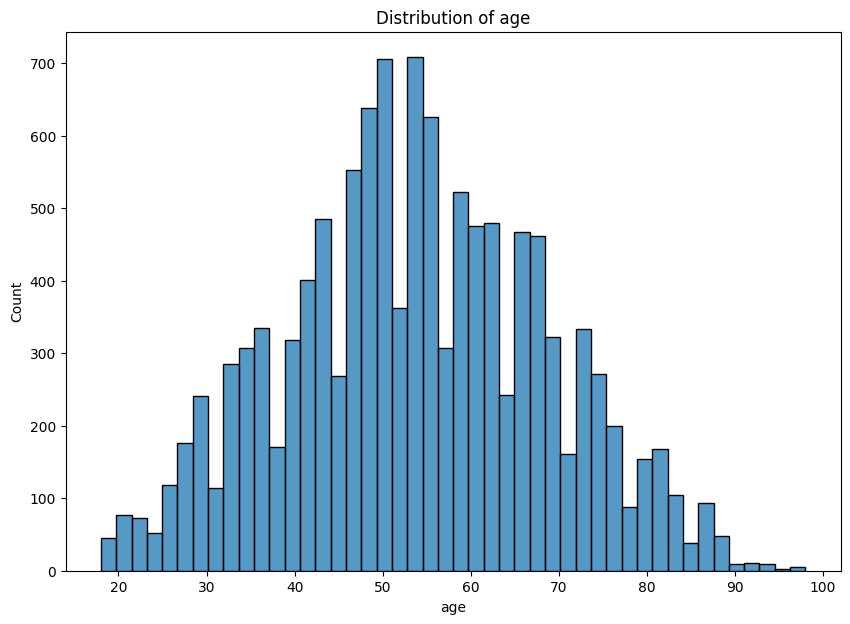

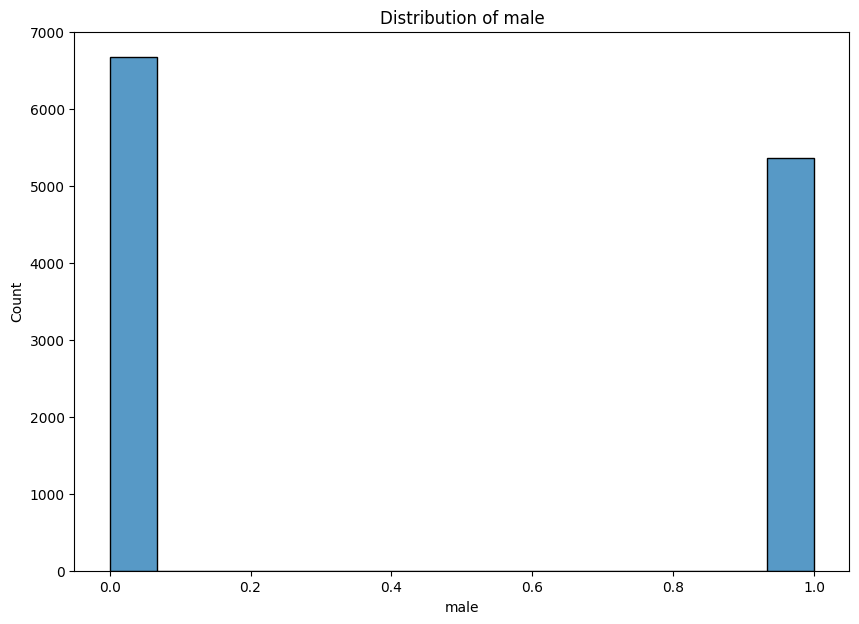

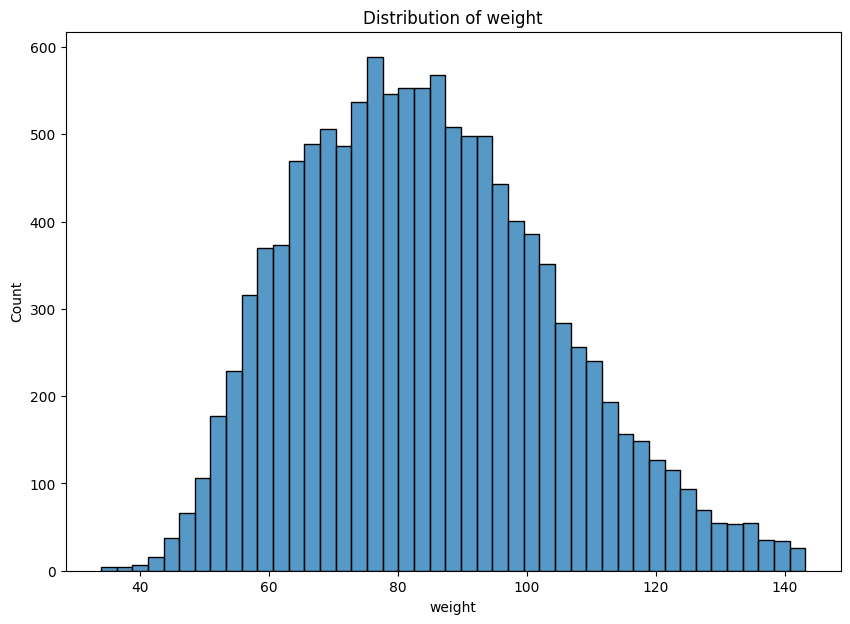

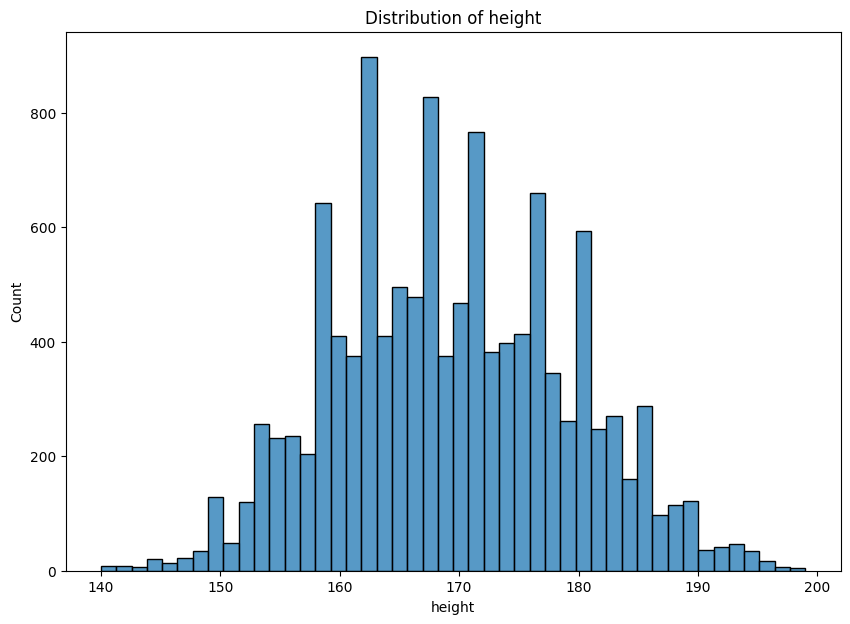

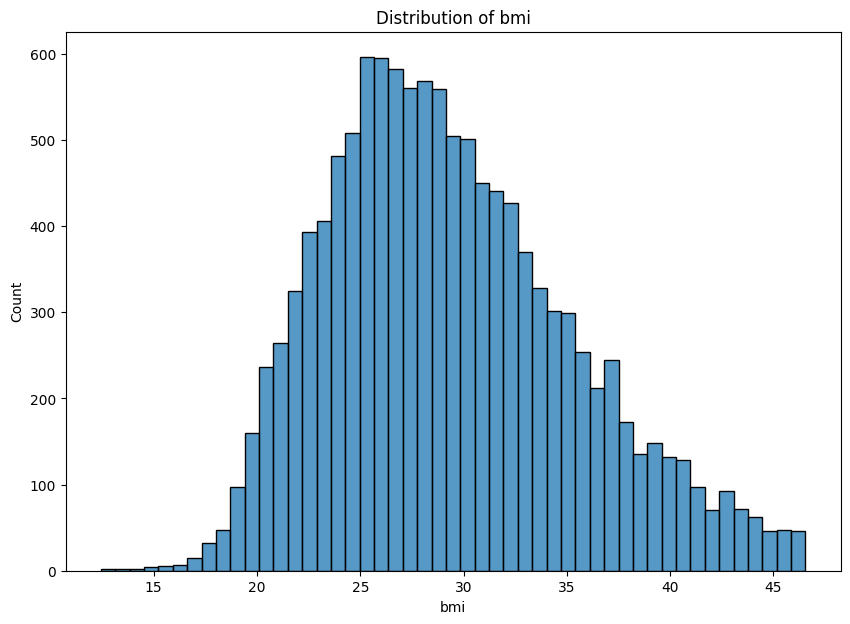

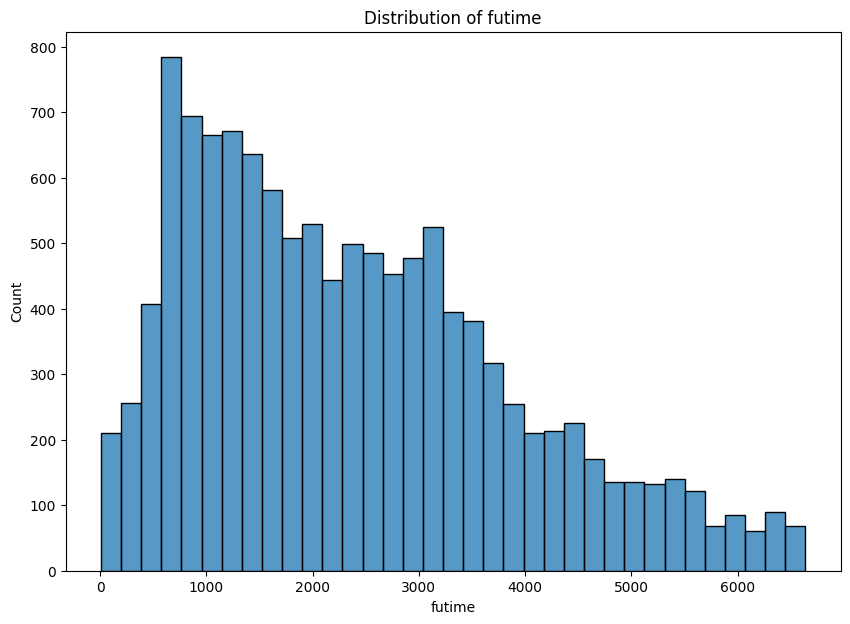

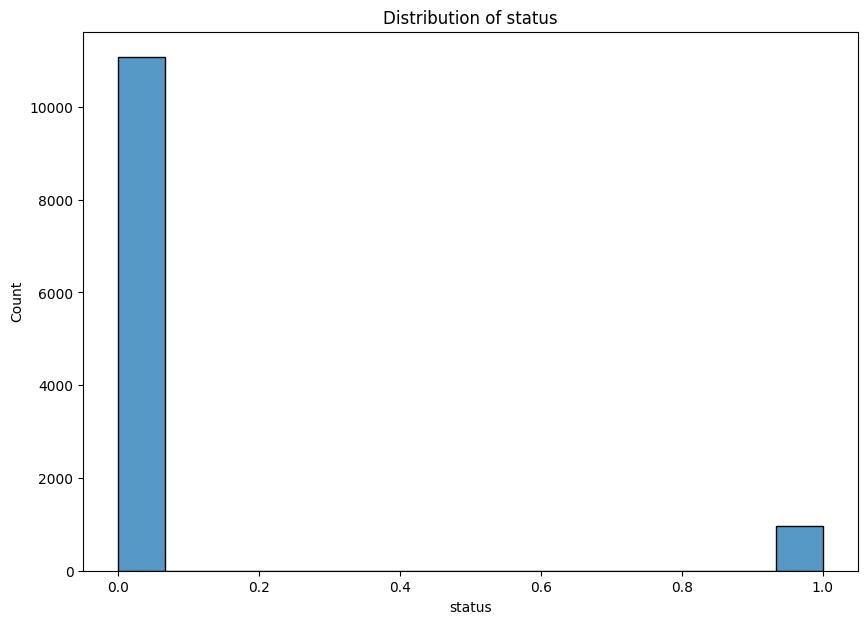

In [108]:
df_columns = ['age','male','weight','height','bmi','futime','status']
for c in df_columns:
    plt.figure(figsize=(10,7))
    sns.histplot(df_clean[c])
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.title(f'Distribution of {c}')
    plt.show()

In [109]:
corr_matrix = df_clean.corr()
corr_matrix['status']*100

Unnamed: 0    -12.238358
id             -0.015128
age            33.234667
male            3.668275
weight         -3.920089
height         -6.561682
bmi            -0.810491
case.id        -1.641007
futime         -9.488221
status        100.000000
Name: status, dtype: float64

In [100]:
# plt.figure(figsize=(25,10))
# sns.heatmap(corr_matrix*100, annot=True, cmap='RdYlGn')

In [110]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

<Axes: xlabel='male', ylabel='count'>

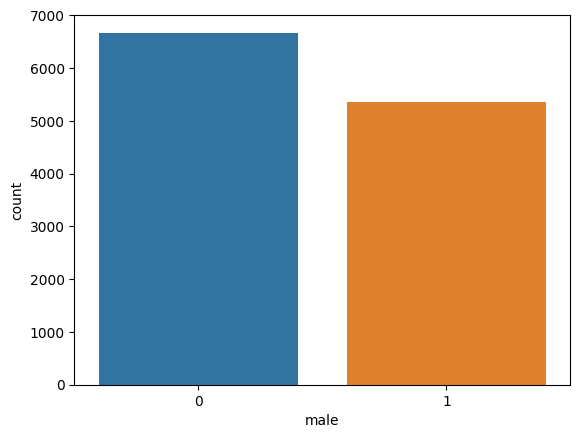

In [111]:
sns.countplot(x ='male', data = df_clean)

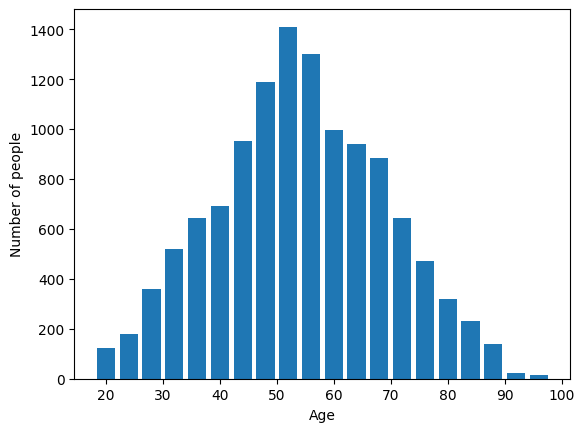

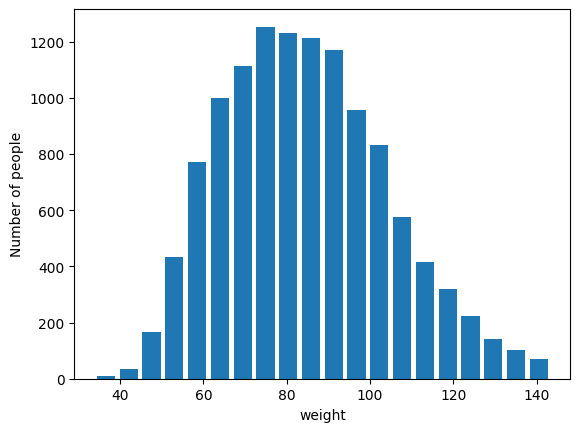

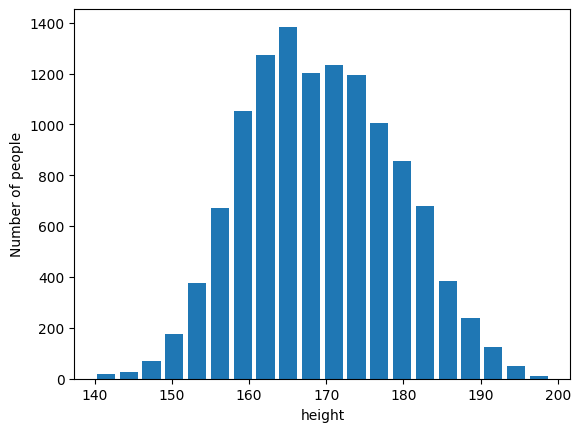

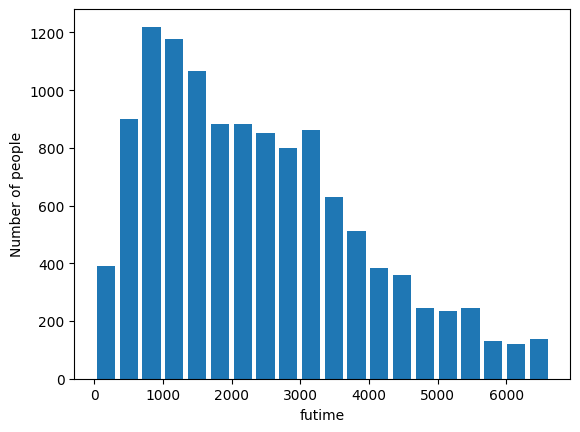

In [112]:
plt.hist(df_clean.age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

plt.hist(df_clean.weight, bins=20, rwidth=0.8)
plt.xlabel('weight')
plt.ylabel('Number of people')
plt.show()

plt.hist(df_clean.height, bins=20, rwidth=0.8)
plt.xlabel('height')
plt.ylabel('Number of people')
plt.show()

plt.hist(df_clean.futime, bins=20, rwidth=0.8)
plt.xlabel('futime')
plt.ylabel('Number of people')
plt.show()

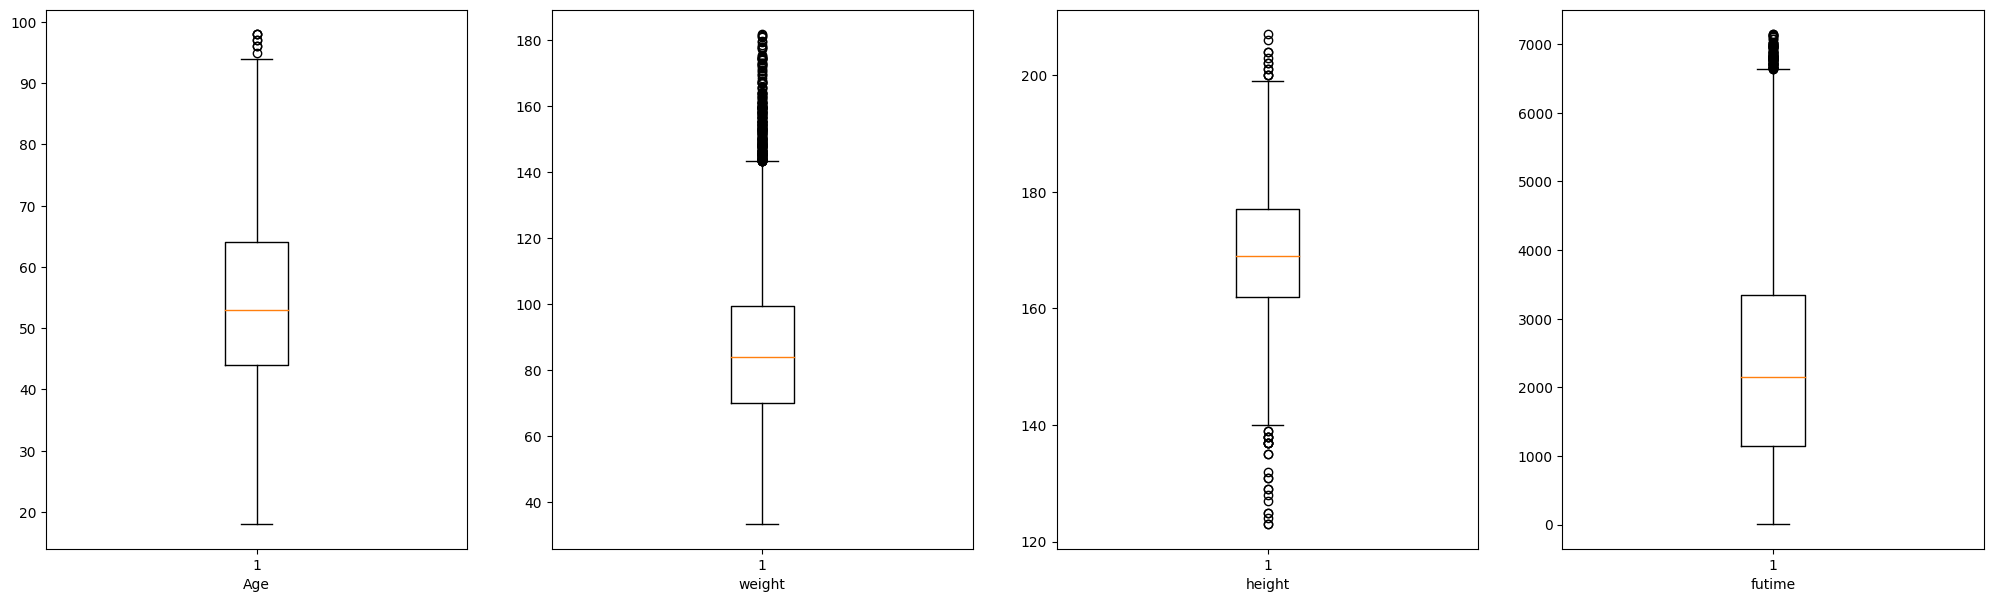

In [114]:
plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
plt.boxplot(df.age)
plt.xlabel('Age')

plt.subplot(1,4,2)
plt.boxplot(df.weight)
plt.xlabel('weight')

plt.subplot(1,4,3)
plt.boxplot(df.height)
plt.xlabel('height')

plt.subplot(1,4,4)
plt.boxplot(df.futime)
plt.xlabel('futime')

plt.show()

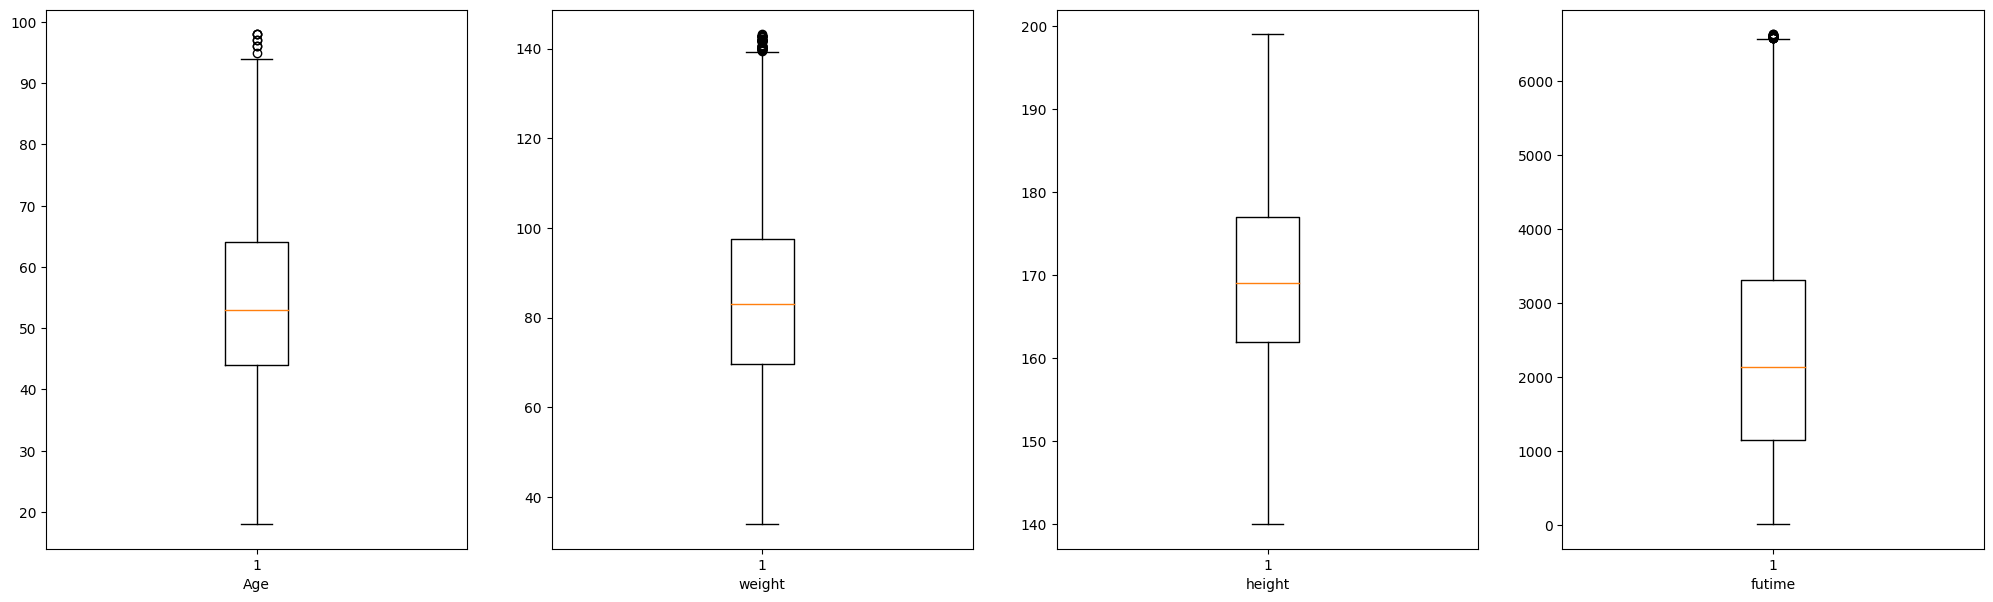

In [115]:
plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
plt.boxplot(df_clean.age)
plt.xlabel('Age')

plt.subplot(1,4,2)
plt.boxplot(df_clean.weight)
plt.xlabel('weight')

plt.subplot(1,4,3)
plt.boxplot(df_clean.height)
plt.xlabel('height')

plt.subplot(1,4,4)
plt.boxplot(df_clean.futime)
plt.xlabel('futime')

plt.show()

In [106]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [117]:
df_clean.shape

(12031, 10)

In [120]:
df_clean.to_csv('./Dataset/Clean_FattyLiver_Data.csv')